# What is the True Normal Human Body Temperature? 

#### Background

The mean normal body temperature was held to be 37$^{\circ}$C or 98.6$^{\circ}$F for more than 120 years since it was first conceptualized and reported by Carl Wunderlich in a famous 1868 book. But, is this value statistically correct?

<div class="span5 alert alert-info">
<h3>Exercises</h3>

<p>In this exercise, you will analyze a dataset of human body temperatures and employ the concepts of hypothesis testing, confidence intervals, and statistical significance.</p>

<p>Answer the following questions <b>in this notebook below and submit to your Github account</b>.</p> 

<ol>
<li>  Is the distribution of body temperatures normal? 
    <ul>
    <li> Although this is not a requirement for CLT to hold (read CLT carefully), it gives us some peace of mind that the population may also be normally distributed if we assume that this sample is representative of the population.
    </ul>
<li>  Is the sample size large? Are the observations independent?
    <ul>
    <li> Remember that this is a condition for the CLT, and hence the statistical tests we are using, to apply.
    </ul>
<li>  Is the true population mean really 98.6 degrees F?
    <ul>
    <li> Would you use a one-sample or two-sample test? Why?
    <li> In this situation, is it appropriate to use the $t$ or $z$ statistic? 
    <li> Now try using the other test. How is the result be different? Why?
    </ul>
<li>  At what temperature should we consider someone's temperature to be "abnormal"?
    <ul>
    <li> Start by computing the margin of error and confidence interval.
    </ul>
<li>  Is there a significant difference between males and females in normal temperature?
    <ul>
    <li> What test did you use and why?
    <li> Write a story with your conclusion in the context of the original problem.
    </ul>
</ol>

You can include written notes in notebook cells using Markdown: 
   - In the control panel at the top, choose Cell > Cell Type > Markdown
   - Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

#### Resources

+ Information and data sources: http://www.amstat.org/publications/jse/datasets/normtemp.txt, http://www.amstat.org/publications/jse/jse_data_archive.htm
+ Markdown syntax: http://nestacms.com/docs/creating-content/markdown-cheat-sheet

****
</div>

In [23]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as sp
% matplotlib inline

df = pd.read_csv('data/human_body_temperature.csv')

In [24]:
df.head()

,temperature,gender,heart_rate
0,99.3,F,68.0
1,98.4,F,81.0
2,97.8,M,73.0
3,99.2,F,66.0
4,98.0,F,73.0


# Question 1 

Here I'm going to try to see visually, through histogram and normal approximations and finally do some tests like Skew and Kurtosis and check for numeric evidence.

F:\Anaconda2\lib\site-packages\statsmodels\nonparametric\kdetools.py:20: VisibleDeprecationWarning: using a non-integer number instead of an integer will result in an error in the future
  y = X[:m/2+1] + np.r_[0,X[m/2+1:],0]*1j


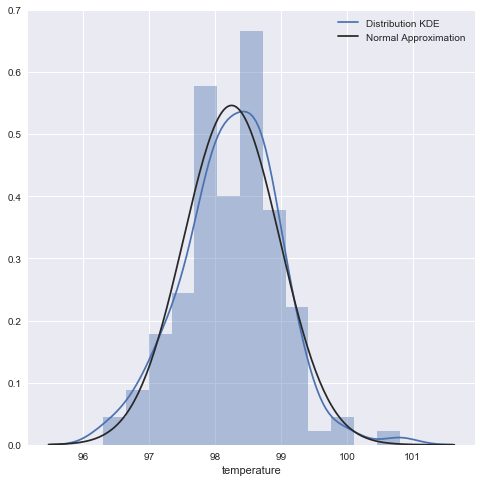

In [36]:
# First, it`s good to try some histogram to see the graph and look for the bell curve and see the number of observations

plt.figure(figsize=(8,8))
ax = sns.distplot(df.temperature, fit=sp.norm, kde_kws={"label":"Distribution KDE"}, fit_kws={"label":"Normal Approximation"})
ax.legend(loc='best')

In [35]:
# Numeric Evidences

skew = sp.skew(df.temperature)
kurtosis = sp.kurtosis(df.temperature)
normaltest = sp.normaltest(df.temperature)


print ("Number of Observations:", len(df.temperature))
print ("Skew:", skew)
print ("Kurtosis:", kurtosis)
print ("Normal Test p-value:", normaltest[1])

Number of Observations: 130
Skew: -0.004367976879081625
Kurtosis: 0.7049597854114693
Normal Test p-value: 0.258747986349


Here we can see that the temperature data is not a very close normal distribution but is a interesting approximation to it. Looking to the histogram we can see that the actual distribution has a lot o similarities to the normal approximattion of it.

The numeric evidence gives us a lot o hope when looking to the Skew value, that is very close to 0 (a normal distribution value). But it gets little far when we look to the kurtosis value, that took some distance from 0. As a final number we can look at the normality test (based on D’Agostino and Pearson’s), that gives us a p-value where we can not reject the null hypothesis that in this case is the normality of the distribution (concluding the normality of the sample distribution). 

After this steps we can at least assume that the temperature samples is approximatly normal. 

# Question 2

Actually, through the basic knowledge in statistics we can conclude that a sample larger than 30 observations could start being a possible normal approximation. So for this we could conclude that 130 could be a decent sample size in this case.

For the indepent assumption, we can assure that the data is independent, because of the fact that one's person temperature doesn't affect the other (that could happen in extreme cases, but we are going to assume here that extreme situations are not possible).

 # Question 3

Here we are going to use a one-sample test because we are not concerned about comparing groups but, in checking for a general human, if the temperature in question is a good mean for the population.

Like we saw above, we could assume that the temperature sample has a decent normal approximation and the number of observations is greater than 30, so we are allowed to use Z statistics rather than t statistics. 

We will test for the null hypothesis being that the population mean temperature is  98.6, and the alternative will be that the population mean temperature is different from 98.6.

In [53]:
#Getting the standard deviation approximation for the population

temp = df.temperature

mean_sample, std_sample = temp.mean(), temp.std()

std_approx = std_sample / np.sqrt(len(temp))

# Checking for the Z-statistic

z = (98.6 - mean_sample) / std_approx
z

5.4548232923640789

In [54]:
# Getting the threshold for a 5% significance level

tr = sp.norm.ppf(.975)


print('Z Statistic:, ', z)
print('Threshold:, ', tr)

Z Statistic:,  5.45482329236
Threshold:,  1.95996398454


We can see that we have a z value bigger than the threshold, so we can reject the null hypothesis and conclude that the 98.6 F is NOT a good mean approximation for the population.

Now if we try using the t statistic:

In [55]:
# Getting the threshold for a 5% significance level\

trz = sp.t.ppf(.975, len(temp)-1)

print('Z Statistic:, ', z)
print('Threshold:, ', trz)


Z Statistic:,  5.45482329236
Threshold:,  1.97852449146


We still have the same result

# Question 4

Let's get the margin of error and the confidence interval

In [60]:
margin_error = tr * std_approx

confidence_interval = (mean_sample - margin_error, mean_sample + margin_error )

print('Margin of error: ', margin_error)
print('Confidence Interval:')
print(confidence_interval)

Margin of error:  0.126034341049
Confidence Interval:
(98.123196428181657, 98.375265110279898)


We can conclud that a person with a 98.3 F or more is with a abnormal temperature than the mean, since that 95% of the values in the population approximation are is this interval above

# Question 5

Here I will use the two-sample teste because I'm going to compare two means.

Lets get the two separate dataset and their parameters:

In [66]:
male = df[df.gender == 'M'].temperature
female = df[df.gender == 'F'].temperature

male_mean, male_std = male.mean(), male.std()
female_mean, female_std = female.mean(), female.std()

dif = male_mean - female_mean
dif

-0.289230769230727

Now we are going to test if the the difference is significant in the population.

Null Hypothesis : There is no difference - dif = male_mean - female_mean = 0 ///
Alternative Hypothesis : There is a difference -  dif = male_mean - female_mean <> 0

In [73]:
# Getting the threshold for the 5% of significance

dtr = sp.norm.ppf(.975)

# Getting the standard error for the difference distribution

dstd = np.sqrt(((male_std**2)/len(male)) + ((female_std**2)/len(female)) )

score = np.abs(dtr) * dstd

print("The means absolute difference : " , np.abs(dif))
print("The threshold difference for 95% significance : " , score)




The means absolute difference :  0.289230769231
The threshold difference for 95% significance :  0.248041184924


We can with this reject the null hypothesis and conclude that there is a signifcant difference in means when comparing men and women.

# Conclusion

With this dataset we could see that the  Carl Wunderlich 120 years assumption is not statistically significant looking at this sample we had. 


Another interesting insight was that we discovered that there is a significant difference in men and women temperatures which could imply in some cation when comparing threshold between genders.